# 봉 입력데이터 생성 예시

                    Open          High           Low         Close     Volume  \
Date                                                                            
2016-09-01  18396.570312  18430.050781  18295.480469  18419.300781   74780000   
2016-09-02  18466.009766  18544.759766  18439.099609  18491.960938   74350000   
2016-09-06  18493.400391  18551.539062  18450.320312  18538.119141   83710000   
2016-09-07  18527.710938  18536.890625  18474.769531  18526.140625   67570000   
2016-09-08  18486.689453  18506.240234  18446.689453  18479.910156   79060000   
2016-09-09  18404.169922  18404.169922  18085.449219  18085.449219  120670000   
2016-09-12  18028.949219  18358.689453  17994.839844  18325.070312  103260000   
2016-09-13  18262.990234  18262.990234  18028.060547  18066.750000  102830000   
2016-09-14  18073.390625  18163.480469  17992.210938  18034.769531  103360000   
2016-09-15  18024.910156  18250.109375  18015.490234  18212.480469   99550000   
2016-09-16  18217.210938  18

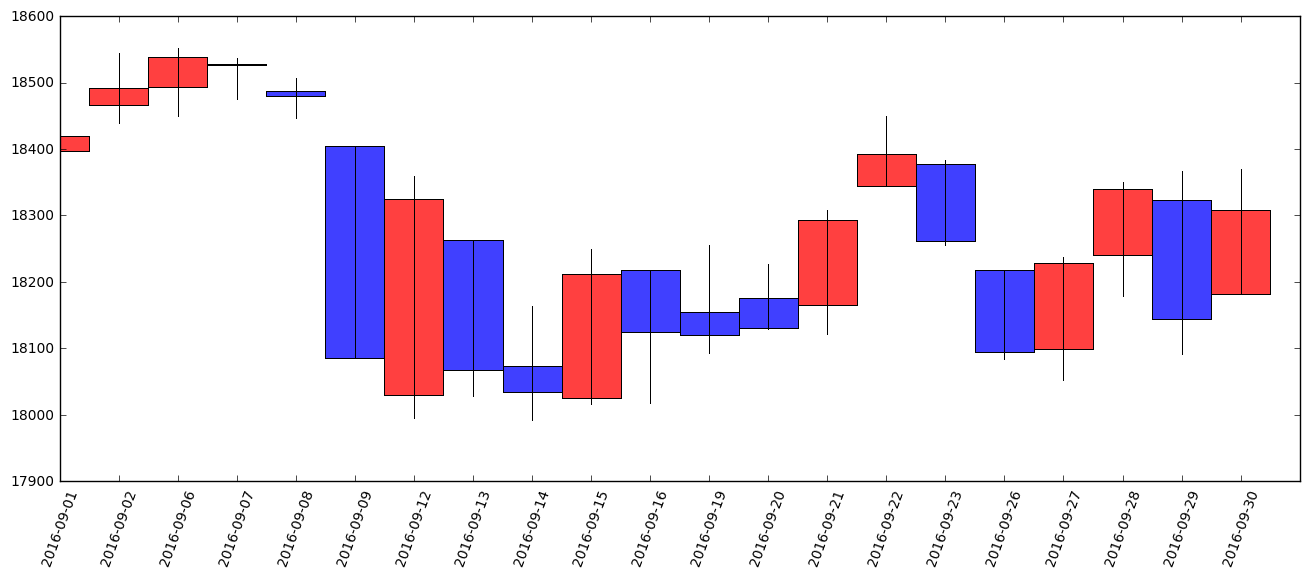

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick2_ohlc

def make_tick_input(symbol, start, end, tick_unit = 0.01):
    hist = web.DataReader(symbol,'yahoo',start,end)
    ticks = 1 / tick_unit
    s_open = np.round(hist.ix[0]['Open'] * ticks) 
    hist['open_tick'] = np.round(hist['Open'] * ticks) - s_open
    hist['body'] = np.round((hist['Close']-hist['Open']) * ticks)
    hist['upper'] = np.round((hist['High']-np.maximum(hist['Open'], hist['Close'])) * ticks)
    hist['lower'] = np.round((np.minimum(hist['Open'], hist['Close'])-hist['Low']) * ticks)
    return hist

start = datetime.datetime(2016,9,1)
end = datetime.datetime(2016,9,30)
hist = make_tick_input('^DJI', start, end)
print(hist)

fid, ax = plt.subplots(figsize=(16,6))
ax.set_xticks(range(0, len(hist)))
ax.set_xticklabels(hist.index.strftime('%Y-%m-%d'), rotation=70)
candlestick2_ohlc(ax, hist['Open'], hist['High'], hist['Low'], hist['Close'],
	width=1, colorup='r', colordown='b')
plt.show()